In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontManager
import matplotlib.style as style 
#sns.set_context('paper')


In [2]:
# Load Files
b15 = pd.read_csv('Boston_Marathon\m2015.csv')
b16 = pd.read_csv('Boston_Marathon\m2016.csv')
b17 = pd.read_csv('Boston_Marathon\m2017.csv')

In [3]:
b15['Year'] = 2015
b16['Year'] = 2016
b17['Year'] = 2017

In [4]:
data = pd.concat([b15,b16,b17],ignore_index=True,sort=False)
data.set_index('Name',inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,10K,...,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Year,Unnamed: 8
Name,,,,,,,,,,,,,,,,,,,,,
"Desisa, Lelisa",3,25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,0:29:43,...,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,2015,NaN
"Tsegay, Yemane Adhane",4,30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,0:29:43,...,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,2015,NaN
"Chebet, Wilson",8,29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,0:29:43,...,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,2015,NaN
"Kipyego, Bernard",11,28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,0:29:44,...,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,2015,NaN
"Korir, Wesley",10,32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,0:29:44,...,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,2015,NaN


In [6]:
data.shape

(79638, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, Desisa, Lelisa to Rigsby, Scott
Data columns (total 25 columns):
Bib              79638 non-null object
Age              79638 non-null int64
M/F              79638 non-null object
City             79637 non-null object
State            70645 non-null object
Country          79638 non-null object
Citizen          3440 non-null object
Unnamed: 9       158 non-null object
5K               79638 non-null object
10K              79638 non-null object
15K              79638 non-null object
20K              79638 non-null object
Half             79638 non-null object
25K              79638 non-null object
30K              79638 non-null object
35K              79638 non-null object
40K              79638 non-null object
Pace             79638 non-null object
Proj Time        79638 non-null object
Official Time    79638 non-null object
Overall          79638 non-null int64
Gender           79638 non-null int64
Division         79638 

In [17]:
def isnull(data):
    nulls = pd.concat([data.isnull().sum().to_frame(),data.isnull().sum().to_frame()/data.shape[0]],axis=1)
    nulls.columns = ['Number','Pct']
    nulls = nulls.sort_values(by='Number',ascending=False)
    nulls = nulls[nulls['Number']>0]
    return nulls
    
fonts = [f.name for f in matplotlib.font_manager.fontManager.afmlist]   

def get_Colors():
    colorname, colorid = [],[]
    for name, hex in matplotlib.colors.cnames.items():
        colorname.append(name)
        colorid.append(hex)
    return list(zip(colorname,colorid))

def annotate(ax,s="%.4f"):
    for p in ax.patches:
        ax.annotate(s % p.get_height(), 
                 (p.get_x() + p.get_width() / 2,
                  p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
def despine(rot=0):
    sns.despine(left=True)
    plt.xticks(rotation = rot);
    plt.xlabel('');
    plt.ylabel('');

In [9]:
nulls = isnull(data)
nulls.drop('Number',axis=1).reset_index()

,index,Pct
0,Unnamed: 8,0.998958
1,Unnamed: 9,0.998016
2,Citizen,0.956805
3,State,0.112923
4,City,0.000013


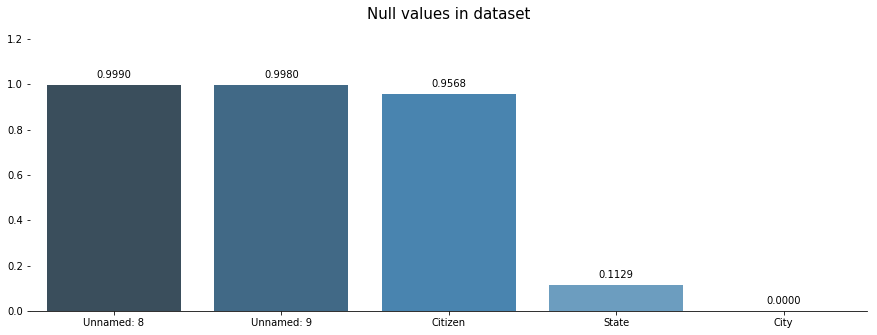

In [18]:
f,ax = plt.subplots(figsize=(15,5))
n1 = sns.barplot(x='index',y='Pct',data=nulls.drop('Number',axis=1).reset_index(),palette=
           'Blues_d')
despine()
annotate(ax=n1)
n1.set_ylim([0,1.2])
n1.set_title('Null values in dataset',fontsize=15,pad=20);

In [11]:
data = data.drop(['Unnamed: 8','Unnamed: 9','Citizen'],axis=1) # Drop Nulls
data.iloc[:, 6:18] = data.iloc[:, 6:18].apply(pd.to_timedelta) # Convert time columns from object to pd time format
data.drop('Proj Time',axis=1,inplace=True) # drop this columns beacuse there are only 0

In [40]:
data.describe()

,Age,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
count,79638.000000,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638,79638.000000,79638.000000,79638.000000,79638.000000
mean,42.415166,0 days 00:25:23.000326,0 days 00:50:51.631520,0 days 01:16:47.095042,0 days 01:43:26.880860,0 days 01:49:14.119503,0 days 02:10:49.505864,0 days 02:39:44.614480,0 days 03:09:57.422486,0 days 03:39:58.872422,0 days 00:08:54.086529,0 days 03:53:09.929166,13273.683417,6693.365064,1618.782792,2015.997639
std,11.355453,0 days 00:04:11.553378,0 days 00:08:13.351595,0 days 00:12:25.000654,0 days 00:17:18.860885,0 days 00:18:12.861931,0 days 00:22:31.555723,0 days 00:28:19.993863,0 days 00:34:17.595018,0 days 00:39:51.034077,0 days 00:01:35.090340,0 days 00:41:32.272068,7663.512720,3927.594786,1448.369424,0.815852
min,18.000000,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:04:56,0 days 02:09:17,1.000000,1.000000,1.000000,2015.000000
25%,34.000000,0 days 00:22:33,0 days 00:45:09,0 days 01:08:04,0 days 01:31:33,0 days 01:36:39,0 days 01:55:26,0 days 02:20:27,0 days 02:46:34,0 days 03:12:48,0 days 00:07:48,0 days 03:24:18,6637.250000,3319.000000,510.000000,2015.000000
50%,42.000000,0 days 00:24:56,0 days 00:49:51,0 days 01:15:07,0 days 01:41:02,0 days 01:46:38,0 days 02:07:27,0 days 02:35:24,0 days 03:04:36,0 days 03:33:48,0 days 00:08:39,0 days 03:46:32,13273.500000,6637.000000,1179.500000,2016.000000
75%,50.000000,0 days 00:27:34,0 days 00:55:12,0 days 01:23:16,0 days 01:52:12,0 days 01:58:27,0 days 02:22:06,0 days 02:54:05,0 days 03:27:42,0 days 04:01:07,0 days 00:09:45,0 days 04:15:25,19910.000000,9955.000000,2219.000000,2017.000000
max,84.000000,0 days 00:55:50,0 days 01:47:16,0 days 02:41:45,0 days 04:29:40,0 days 04:47:17,0 days 04:36:06,0 days 07:36:38,0 days 06:51:31,0 days 07:59:12,0 days 00:24:30,0 days 10:30:23,26629.000000,14581.000000,6004.000000,2017.000000


In [12]:
ym = data.groupby('Year')['Bib'].count().to_frame().reset_index()
ym

,Year,Bib
0,2015,26598
1,2016,26630
2,2017,26410


In [13]:
ym2 = data.groupby(['Year','M/F'])['Bib'].count().to_frame().reset_index()
ym2

,Year,M/F,Bib
0,2015,F,12017
1,2015,M,14581
2,2016,F,12167
3,2016,M,14463
4,2017,F,11972
5,2017,M,14438


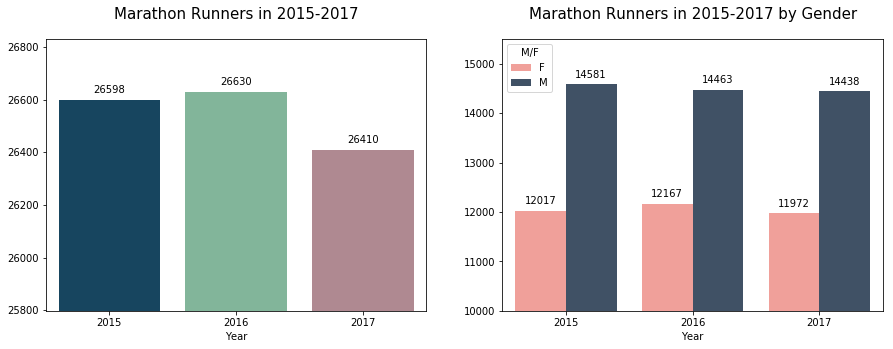

In [30]:
f,ax = plt.subplots(1,2,figsize=(15,5))
y1 = sns.barplot(x='Year',y='Bib',data=ym,
           palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[0])
annotate(ax=y1,s="%.0f")
y1.set_ylabel('')
y1.set_ylim([25798,26830])
y1.set_title('Marathon Runners in 2015-2017',fontsize=15,pad=20);

y2 = sns.barplot(x='Year',y='Bib',data=ym2,hue='M/F',
           palette=['#FE938C','#3A506B'],ax=ax[1])
annotate(ax=y2,s="%.0f")
y2.set_ylabel('')
y2.set_ylim([10000,15500])
y2.set_title('Marathon Runners in 2015-2017 by Gender',fontsize=15,pad=20);

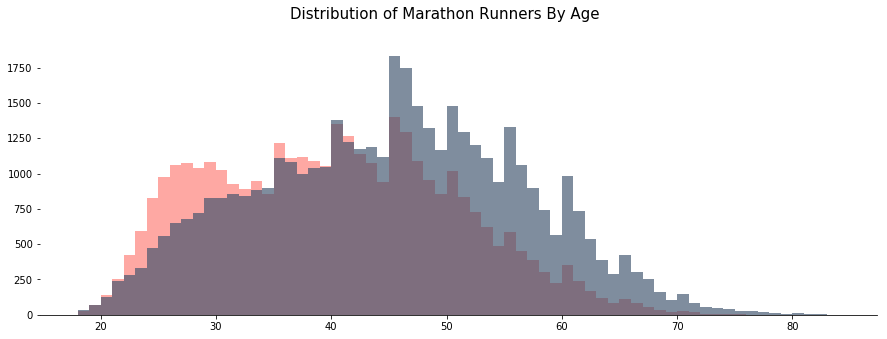

In [76]:
bins1 = round((data[data['M/F']=='F']['Age'].max() - data[data['M/F']=='F']['Age'].min()))
bins2 = data[data['M/F']=='M']['Age'].max() - data[data['M/F']=='M']['Age'].min()
f,ax = plt.subplots(1,1,figsize=(15,5))
# sns.distplot(data[data['M/F']=='F']['Age'],color='#FE938C',bins=bins1)
# sns.distplot(data[data['M/F']=='M']['Age'],color='#3A506B',bins=bins2)
plt.hist(data[data['M/F']=='F']['Age'],color='#FE938C',alpha=0.8,bins=bins1);
plt.hist(data[data['M/F']=='M']['Age'],color='#3A506B',alpha=0.65,bins=bins2);
despine()
plt.suptitle('Distribution of Marathon Runners By Age',fontsize=15);

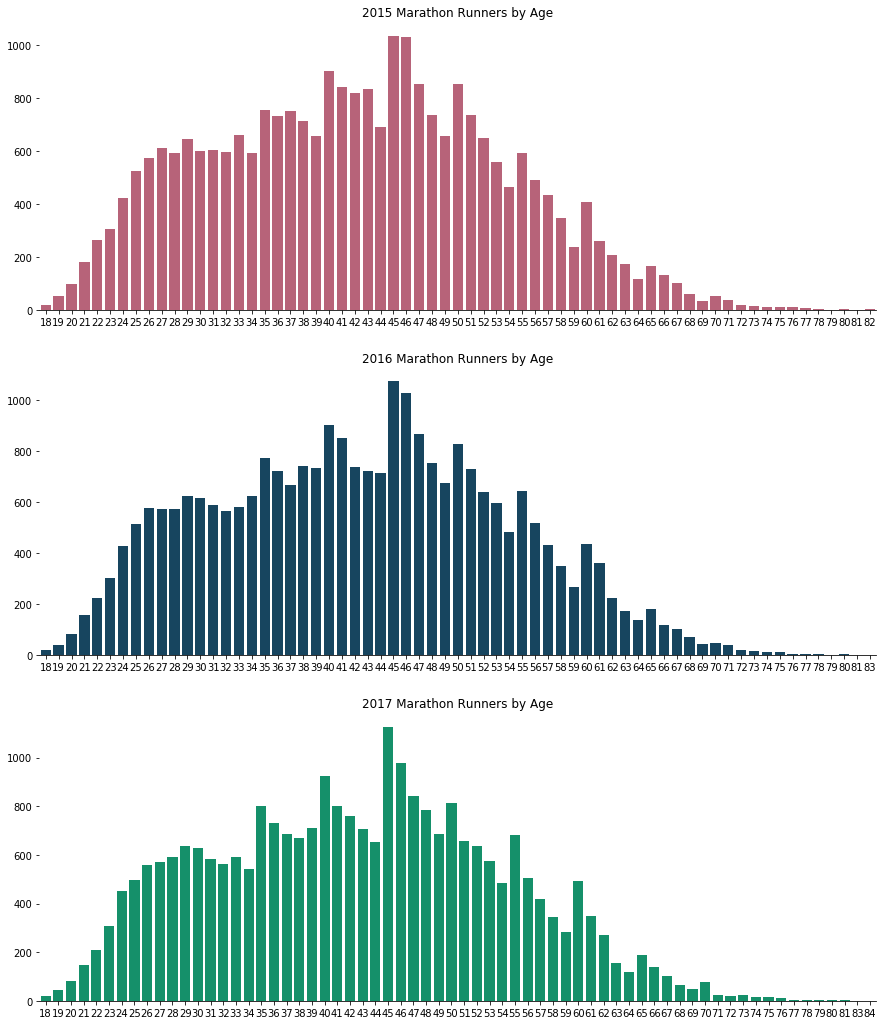

In [113]:
y1,y2,y3 = data[data['Year']==2015],data[data['Year']==2016],data[data['Year']==2017]
f,ax = plt.subplots(3,1,figsize=(15,18))
a1 = sns.countplot('Age',data=y1, palette=['#c55572'],ax=ax[0])
a1.set_title('2015 Marathon Runners by Age')
a1.set_ylabel('');
a1.set_xlabel('');
a2 = sns.countplot('Age',data=y2, palette=['#0B486B'],ax=ax[1])
a2.set_title('2016 Marathon Runners by Age')
a2.set_ylabel('');
a2.set_xlabel('');
a3 = sns.countplot('Age',data=y3, palette=['#00A572'],ax=ax[2])
a3.set_title('2017 Marathon Runners by Age')
a3.set_ylabel('');
a3.set_xlabel('');
despine()


In [127]:
cm = sns.light_palette("#c55572", as_cmap=True)
data.groupby(['M/F','Year'])['Age'].describe().style.background_gradient(cmap = cm)

In [156]:
m = data[data['M/F']=='M']
f = data[data['M/F']=='F']
oldf = f.loc[f['Age'].idxmax()].head(1) # oldest runner Female in 2015,2016,2017
oldm = m.loc[m['Age'].idxmax()].head(1) # oldest runner Male in 2015,2016
pd.concat([oldf,oldm])
# Oldest runner by gender

,Bib,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
Name,,,,,,,,,,,,,,,,,,,,,
"Beiers, Katherine",25555,82,F,Santa Cruz,CA,USA,00:36:54,01:14:34,01:54:54,02:36:39,...,03:18:39,04:04:44,04:49:32,05:33:24,00:13:30,05:53:40,26411,11923,1,2015
"Wilson, Harold",24564,82,M,Tyler,TX,USA,00:28:17,00:56:47,01:25:21,01:55:29,...,02:26:15,02:58:08,03:31:53,04:04:23,00:09:51,04:18:00,21626,12387,1,2015


In [182]:
## Youngest Males
#data[data['M/F']=='M'].sort_values(by=['Age','Year'],ascending=True).head()
## Youngerst Females
# data[data['M/F']=='F'].sort_values(by=['Age','Year'],ascending=True).head()

In [198]:
## Oldest Males & Females
of = y3[y3['M/F']=='F']['Age'].nlargest(3).to_frame()
om = y3[y3['M/F']=='M']['Age'].nlargest(3).to_frame()
om['Gender'] = 'Male'
of['Gender'] = 'Female'
yf = y3[y3['M/F']=='F']['Age'].nsmallest(3).to_frame()
ym = y3[y3['M/F']=='M']['Age'].nsmallest(3).to_frame()
ym['Gender'] = 'Male'
yf['Gender'] = 'Female'
pd.concat([of,om])

,Age,Gender
Name,,
"Beiers, Katherine",84,Female
"Bardin, Dorothy",77,Female
"Rigney, Hansi L.",75,Female
"Yoo, Jack",83,Male
"Shimojou, Michiharu",81,Male
"Roake, Samuel C.",81,Male


In [197]:
## Youngest Males & Females
pd.concat([yf,ym])

,Age,Gender
Name,,
"Rucker, Alyssa",18,Female
"Pohl, Elizabeth S.",18,Female
"Georgaklis, Sofia",18,Female
"Eastmond, Riley J",18,Male
"Fickes, Ben",18,Male
"Moore, Ryan D",18,Male


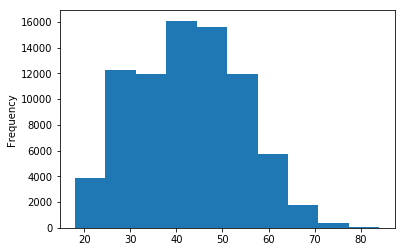

In [36]:
data['Age'].plot(kind='hist')

In [16]:
data.groupby('Age')['Bib'].count()

Age
18      62
19     137
20     264
21     489
22     701
23     920
24    1301
25    1539
26    1709
27    1755
28    1758
29    1906
30    1849
31    1779
32    1726
33    1834
34    1756
35    2327
36    2188
37    2108
38    2128
39    2101
40    2734
41    2494
42    2318
43    2265
44    2056
45    3236
46    3039
47    2566
      ... 
55    1920
56    1514
57    1287
58    1044
59     788
60    1337
61     971
62     704
63     507
64     374
65     536
66     387
67     306
68     198
69     127
70     180
71     105
72      62
73      57
74      45
75      39
76      29
77      19
78      15
79       7
80      12
81       5
82       4
83       3
84       1
Name: Bib, Length: 67, dtype: int64